<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Alexia Marisol Diaz Verduzco & Frida María Hernández López

**Fecha:** 14 de octubre del 2021.

**Expediente** : if720500 & if720476
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/FridaHernandezL/ProyectoConjunto_Modulo2

# Proyecto TEMA-2

### 1.1 Simulación aplicada a clientes con tarjeta de crédito.

### 1.2 Objetivos.
> #### 1.2.1 Objetivo general.
>  - Presentar a la institución bancaria información valiosa y rentable para la toma de decisiones.


> #### 1.2.2 Objetivos específicos.
>  - Evaluar y simular el límite de crédito promedio para los clientes.
>  - Proyectar la categoría de la tarjeta más común dentro de la institución bancaria.   
>  - Determinar por medio de simulaciones el rango de edad al que conviene ofrecer futuras tarjetas de crédito.
>  - Analizar la conducta de los clientes en base al tiempo activo dentro de la institución. 

### 1.3 Definición del problema.

> Una tarjeta de crédito es un documento de material plástico o metal emitido por un banco o institución especializada a nombre de una persona, que podrá utilizarla para efectuar compras sin tener que pagar en efectivo y pudiendo, además, llevar el pago de los productos a períodos futuros, el usuario debe asumir la obligación de devolver el importe dispuesto y de pagar los intereses, comisiones bancarias y gastos.

> En muchos países sobretodo subdesarrollados el uso de tarjetas de crédito es un tema poco conocido así como también es común la desconfianza a las mismas. Sin embargo, por el rumbo profesional que ambas llevamos consideramos este tema como algo muy importante e interesante.  

> Entre los fénomenos financieros que se presentaron durante la pandemia como sociedad, predomina un deceso importante en las líneas de crédito; con este análisis queremos brindar a la institución en cuestión una visión más organizada sobre algunos de los aspectos de los clientes, para así ayudar a la toma de decisiones dentro de la financiera brindando una perspectiva más amplia, que optimicen las ventas e ingresos en el banco.

### 1.4 Nodos y variables que se decidieron simular y porqué

> Los nodos que decidimos simular son:


>  -  Límite de crédito 
>  -  Categoría de la tarjeta 
>  -  Edad del cliente
>  -  Tiempo activo

Conocer el **límite de crédito** promedio nos ayudará a visualizar como opera la institución financiera de forma interna, es decir, que cantidades promedio está autorizada a otorgar.  

El objetivo de proyectar la **categoría de la tarjeta** más común 

La finalidad de conocer el rango de **edad** más frecuente, nos ayuda a visualizar posibles clientes de la institución que aun no cuentan con tarjeta de crédito y son candidatos a obtener una.  

Al analizar el **tiempo activo** de los clientes nos brindará información del comportamiento de los mismos, en otras palabras identificaremos en un futuro cuantos clientes activos tendrá la institución para que el banco tome decisiones respecto a su administración(valuación del riesgo). 

### Diagrama de flujo 

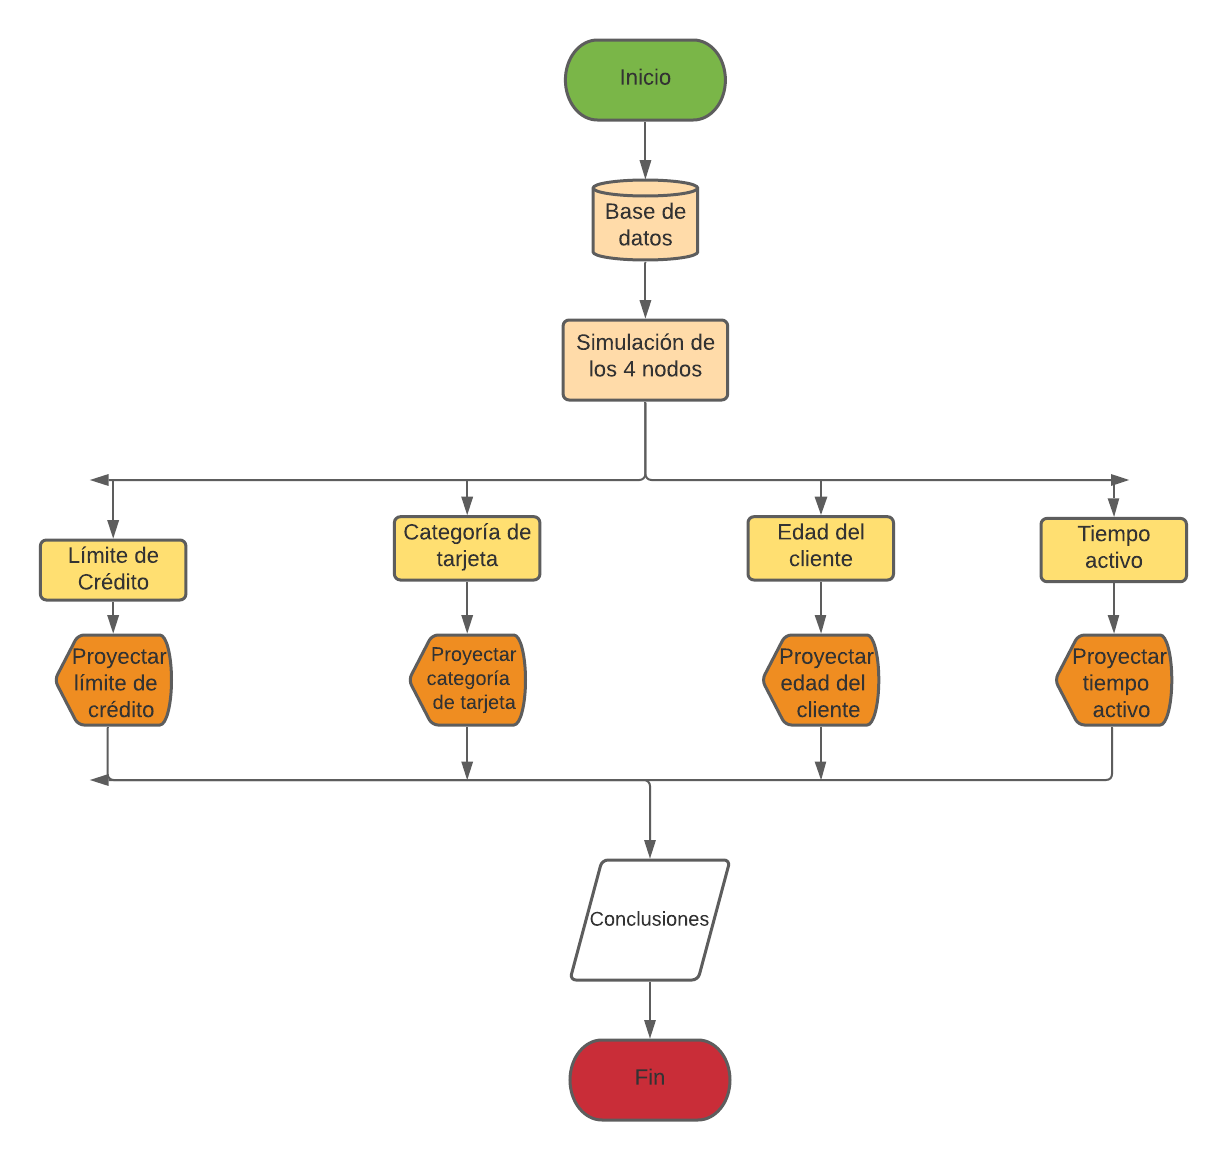

In [1]:
from IPython.display import Image
Image("Diagrama_Proyecto.PNG")

### 1.5 Definición de hipótesis y supuestos

> Supuestos Constantes 
>   -  El dólar estadounidense es la moneda base para el límite de crédito. 
>   -  La institución bancaria solamente cuenta con 4 tipos de tarjeta.
>   -  Los meses con tenencia de la cuenta bancaria serán tomados como 30 días.
>   -  Toda la información presentada es real. 
>   -  Las 4 variales a utilizar son las más relevantes para presentar a la institución.

> Hipótesis
>   -  Un 60% de los clientes cuentan con un límite de crédito igual o inferior al promedio.
>   -  La categoría de la tarjeta más común es la "Blue"
>   -  El rango de edad más común de los clientes se centra en personas en la etapa de la vida laborable o productiva.
>   -  Los clientes no perduran con su tarjeta de crédito más de 3 años. 

### 1.6 Obtención de la base de datos

### Librerías 

In [30]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as st     
import statsmodels.api as sm 
import seaborn as sns

### Base de datos normal 

aquí se explica de donde se obtuvo la base de datos
https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [3]:
data= pd.read_csv("BankChurners.csv")
data= data.set_index('ID_cliente')
data.head()

,Cuenta,Edad,Genero,Dependientes,Nivel_educativo,Estado_civil,Ingresos,Categoria_tarjeta,Meses_cuenta,Recuento_relaciones_total,...,Limite_credito,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
ID_cliente,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Base de datos a utilizar (limpia)

In [4]:
data = data[['Limite_credito','Categoria_tarjeta','Edad','Meses_cuenta']]
data.head()

,Limite_credito,Categoria_tarjeta,Edad,Meses_cuenta
ID_cliente,,,,
768805383,12691.0,Blue,45,39
818770008,8256.0,Blue,49,44
713982108,3418.0,Blue,51,36
769911858,3313.0,Blue,40,34
709106358,4716.0,Blue,40,21


### 1.7 Simulación nodos

In [23]:
def kde_scipy_1(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

def kde_scipy_2(x,bandwidth=0.1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

def kde_scipy_3(x,bandwidth=1, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return lambda x_grid: kde.evaluate(x_grid)

In [24]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 b: 'Entero máximo del vector x',
                 n: 'Salto del vector en R2'):
    X = np.zeros(N)
    i = 0 
    while i < N:
        R2 = np.random.uniform(0,max_f) 
        R1 = np.random.uniform(0,b,n)

        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

In [25]:
def muestreo_est(B: 'Número de estratos'):
    u= np.random.uniform(B) 
    i=np.arange(0,B) 
    v = (u+i)/B 
    return v 


def Gen_distr_discreta_(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    y, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], y, label=label)
    plt.legend()
    plt.show()


#### NODO 1. Límite de crédito  

El primero nodo se caracteriza por el uso de la variable **límite de crédito**, el cual se define como la cantidad máxima que un cliente de la entidad financiera puede disponer al poseer una tarjeta de crédito.  

Debido a que el objetivo de un banco es colocar dinero, captado anteriormente del público, a tasas más elevadas; con este nodo se busca simular el promedio de límite de crédito que ayudará a estimar que cantidad de activos tendrá disponible una vez que el cliente salde su deuda, sumada a sus respectivos intereses. 

(array([5211., 1524.,  931.,  589.,  407.,  299.,  252.,  161.,  128.,
         625.]),
 array([ 1438.3 ,  4746.07,  8053.84, 11361.61, 14669.38, 17977.15,
        21284.92, 24592.69, 27900.46, 31208.23, 34516.  ]),
 <BarContainer object of 10 artists>)

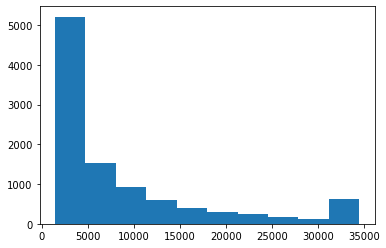

In [20]:
limite =  data['Limite_credito']
plt.hist(limite)

In [26]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv=20) # 20-fold cross-validation
grid.fit(np.array(limite)[:, None])
print(grid.best_params_)

{'bandwidth': 1.0}


In [33]:
limits = kde_scipy_2(data['Limite_credito'])
limits

<function __main__.kde_scipy_2.<locals>.<lambda>(x_grid)>

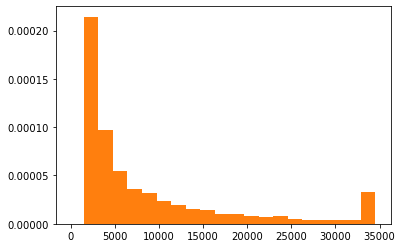

In [34]:
x_limite = np.arange(0.40,3.30,.10)
plt.figure()
plt.plot(x_limite,limits(x_limite))
plt.hist(limite,bins = 20, density = True)
plt.show()

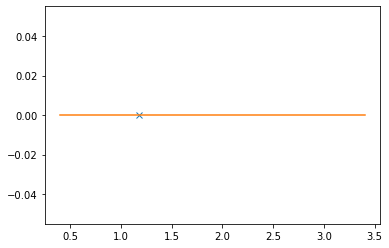

In [36]:
f = limits
x = np.arange(0.40,3.50,.10)

max_limite = f(optimize.fmin(lambda x:-f(x),0,disp=False))

plt.plot(1.18,max_limite,'x',lw = 10)

plt.plot(x,limits(x))

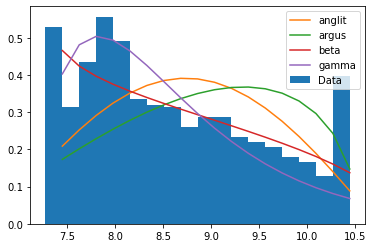

(array([0.16150546, 0.27376856, 0.26075743, 0.1665854 ]),
 array([0.52909572, 0.31432537, 0.4340151 , 0.55706061, 0.49106347,
        0.33557868, 0.31879975, 0.31432537, 0.25951418, 0.28859767,
        0.28859767, 0.23322718, 0.22092263, 0.20638089, 0.1789753 ,
        0.16555215, 0.12975709, 0.39822004]))

ValueError: operands could not be broadcast together with shapes (18,) (4,) 